<hr/>

# Introduction to Data Science - Fall 2021
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>


- Ridge Regression & Sparse Regression

- Linear Algebra Recap
<hr/>

## Recap: Linear Regression/Ordinary Least Squares

(see written notes)

# Regularization: Making Linear Regression more flexible

Penalize large coefficients in $\beta$

- **Ridge regression** uses $L_2$-regularization, where $\|\beta\|^2_2 = \sum_{i=1}^N \beta_i^2$

> $\displaystyle \hat{\beta} = \arg\!\min_{\beta} \, \| y- X\beta \,\|^2_2\ + \alpha\,\|\beta\|^2_2$  
><br/>
> or even with a constant matrix $\Gamma$
><br/><br/>
> $\displaystyle \hat{\beta} = \arg\!\min_{\beta} \, \| y- X\beta \,\|^2_2 + \alpha\,\|\Gamma\beta\|^2_2$  

- **Lasso regression** uses $L_1$-regularization, where $\|\beta\|_1 = \sum_{i=1}^N |\beta_i|$.

> $\displaystyle \hat{\beta} = \arg\!\min_{\beta}  \, \| y- X\beta \,\|^2_2 + \alpha\,\|\beta\|_1$ 
><br/><br/>
> $L_1$ yields sparse results

Different geometric meanings! See written notes for more details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We define a function to sample $n=\text{'n_sample'}$ points $x_1,\ldots,x_n$ uniformly distributed at random and define 
corresponding samples $y_i=f(x_i) + \epsilon_i$ where 
$f(x)= \sin(4 x) + x$ and $\epsilon_i$ are i.i.d. standard random variables. 

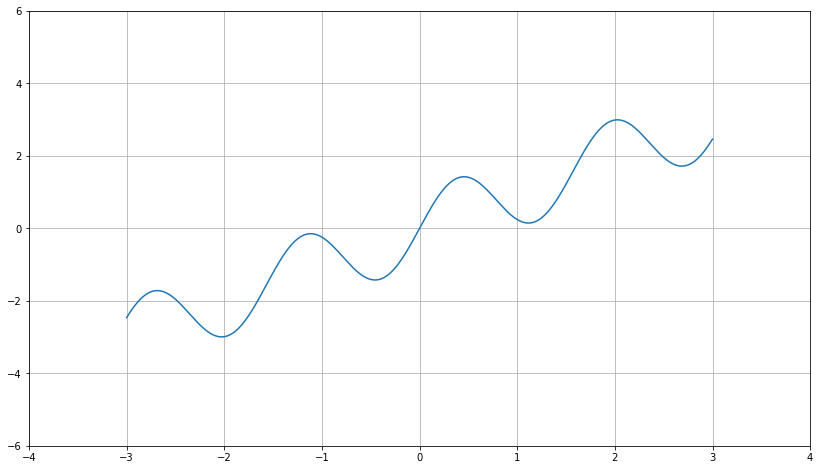

In [2]:
### function to create random samples from a wave-like signal
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    x = np.sort(x)
    y_no_noise = (np.sin(4 * x) + x)
    y = y_no_noise + rnd.normal(size=len(x))/2
    return x.reshape(-1, 1), y

# Visualize the function f:
fn = lambda x: np.sin(4 * x) + x
line_xvalues = np.linspace(-3, 3, 1000).reshape(-1, 1)
plt.figure(figsize=(14,8))
plt.plot(line_xvalues,fn(line_xvalues))
ax = plt.gca()
ax.set_ylim(-6, 6)
ax.set_xlim(-4, 4)
ax.grid(True)

We create a data set (consisting of $x$-coordinates in '$X$' and $y$-coordinates in '$y$') based on the above model, using a 'nr_samples' samples.

In [3]:
# %% Create data samples
nr_samples = 30
X, y = make_wave(n_samples=nr_samples)
y = y.reshape((len(y), 1))
dfX = pd.DataFrame(X)

The samples can be visualized as follows.

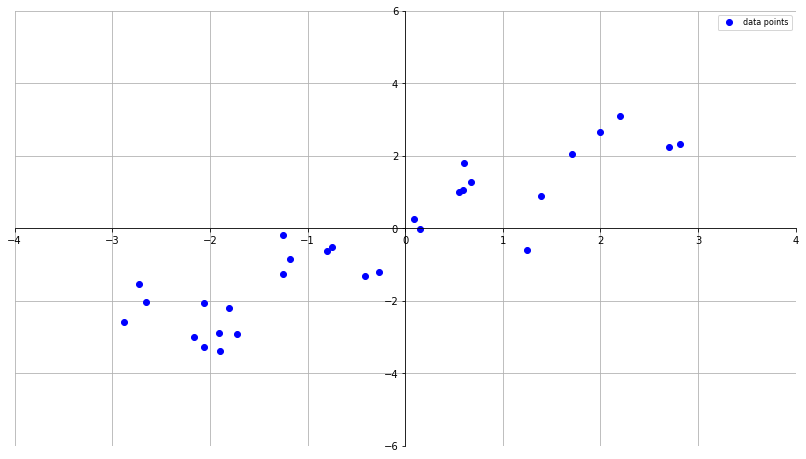

In [4]:
# %% Plot training data
plt.figure(figsize=(14,8))
plt.plot(X,y,'o',c='blue')
ax = plt.gca()
ax.set_ylim(-6, 6)
ax.set_xlim(-4, 4)
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.legend(["data points"],loc=0,fontsize=8)
ax.grid(True)

We now train a linear regression model (with $\alpha=\text{alphaval}$) on the samples of the training set, and evaluate the mean squared errors as well as the resulting $R^2$ coefficient. We also train a linear and a ridge regression model on **polynomial features** of degree='degree_poly'.

We fit first the linear regression model to the training data with unmodified features. This corresponds to a truly linear model in the standard coordinate system.

In [5]:
# %% Fit models to training data
lr = LinearRegression().fit(X, y) # linear regression

Use polynomial features:

In [6]:
# %% Run linear regression with polynomial features of degree 'degree_poly':
from sklearn.preprocessing import PolynomialFeatures
degree_poly = 24;
poly = PolynomialFeatures(degree_poly) # define polynomial data model
X_poly = poly.fit_transform(X) # obtain coordinates of polynomial features of training set
polylr = LinearRegression().fit(X_poly,y) # perform linear regression with polynomial features

Now, we use ridge regression on the polynomial features for a fixed regularization parameter $\alpha=\text{alphaval}$. Please note the options of [linear_models](https://scikit-learn.org/stable/modules/linear_model.html#linear-model).

In [7]:
import warnings
from scipy.linalg import LinAlgWarning
from sklearn.linear_model import Ridge
warnings.filterwarnings("ignore", category=LinAlgWarning)
# %% Run ridge regression with polynomial features
alphaval = 1 # ridge regression parameter alpha
polyridge = Ridge(alpha=alphaval).fit(X_poly,y) # perform ridge regression with polynomial features
alphaval2 = 10**3 # ridge regression parameter alpha
polyridge2 = Ridge(alpha=alphaval2).fit(X_poly,y) # perform ridge regression with polynomial features
line = np.linspace(-8, 8, 1000).reshape(-1, 1)
line_poly = poly.transform(line)

We output the $R^2$ for the three considered models, for both training and test set, as well as the _mean squared errors_ for these.

In [12]:
text_errors = ['MSE of  linear regression:','MSE of linear regression, polynomial features:',\
                    'MSE of ridge regression, alpha = '+ str(alphaval)+', polynomial features:',\
                    'MSE of ridge regression, alpha = '+ str(alphaval2)+', polynomial features:']
trainerrors_list = [mean_squared_error(lr.predict(X), y), mean_squared_error(polylr.predict(X_poly), y),\
                    mean_squared_error(polyridge.predict(X_poly), y),\
                    mean_squared_error(polyridge2.predict(X_poly), y)]
text_r2 = ['R2, linear regression:','R2 of linear regression, polynomial features:',\
           'R2 of ridge regression, alpha = '+ str(alphaval)+', polynomial features:',\
           'R2 of ridge regression, alpha = '+ str(alphaval2)+', polynomial features:']
r2_train_list = [lr.score(X,y), polylr.score(X_poly, y), \
                 polyridge.score(X_poly, y),polyridge2.score(X_poly, y)]

pd.options.display.max_colwidth = 100
print(pd.DataFrame(trainerrors_list, index=text_errors, columns=['']))
print(pd.DataFrame(r2_train_list, index=text_r2, columns=['']))

                                                                     
MSE of  linear regression:                                   0.639160
MSE of linear regression, polynomial features:               0.058299
MSE of ridge regression, alpha = 1, polynomial features:     0.204261
MSE of ridge regression, alpha = 1000, polynomial features:  0.480873
                                                                    
R2, linear regression:                                      0.825084
R2 of linear regression, polynomial features:               0.984046
R2 of ridge regression, alpha = 1, polynomial features:     0.944101
R2 of ridge regression, alpha = 1000, polynomial features:  0.868402


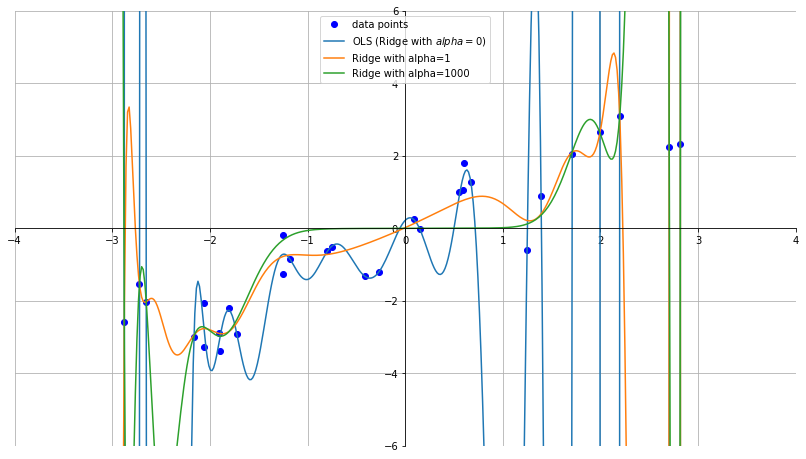

In [13]:
# %% Plot summary
plt.figure(figsize=(14,8))
plt.plot(X,y,'o',c='blue')
#plt.plot(line, lr.predict(line))
plt.plot(line, polylr.predict(line_poly))
plt.plot(line, polyridge.predict(line_poly))
plt.plot(line, polyridge2.predict(line_poly))
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-6, 6)
ax.set_xlim(-4, 4)
ax.legend(["data points","OLS (Ridge with $alpha = 0$)","Ridge with alpha="+str(alphaval),"Ridge with alpha="+str(alphaval2)], loc=0,fontsize=10)
ax.grid(True)

We observe that for larger regularization parameters $\alpha$, the regression function is "smoother". From the perspective of the regression coefficients (cooridnates of the vector $\widehat{\beta}$), we see that for large $\alpha$, the coefficients are "shrinked" by Ridge regression.

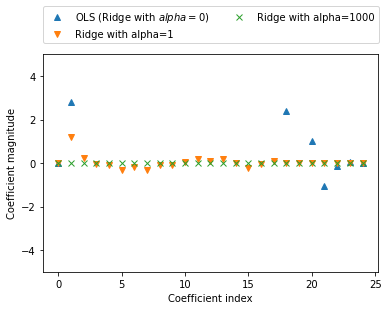

In [14]:
plt.figure()
plt.plot(polylr.coef_.T, '^', label="OLS (Ridge with $alpha = 0$)")
plt.plot(polyridge.coef_.T, 'v', label="Ridge with alpha="+str(alphaval))
plt.plot(polyridge2.coef_.T, 'x', label="Ridge with alpha="+str(alphaval2))
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

## Exploring the Bias-Variance Tradeoff

- Bias: the difference between the average prediction of our model and the correct value which we are trying to predict. 
> Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data (underfitting).

- Variance: the variability of model prediction for a given data point or a value which tells us the spread of our data.
> Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data (overfitting).

<img src='files/BiasVarianceTradeoff.png' width=400 align=left>

### Ridge Regression

We recall the [diabetes](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) dataset from last week's problem set. We use `StandardScaler` from scikit-learn to standardize the scale of the dataset.

In [15]:
import pandas as pd
# Download the diabetes file, and save it in the working directory
# Read the text file into a pandas dataframe
diabetes = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t')
diabetes

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
diabetes_df = diabetes.drop(columns = ['SEX'])
diabetes_df
scaler = StandardScaler()
saved_cols = diabetes_df.columns
diabetes_scaled = scaler.fit_transform(diabetes_df)
diabetes_df_scaled = pd.DataFrame(diabetes_scaled, columns = saved_cols)
#diabetes_df_scaled

We use a seperate the dataset at random into a training set that contains 80% of the samples and a test set that contains 20% of the samples. 

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(diabetes_df_scaled, test_size=0.2) #random_state
train_X = train.drop(columns = ["Y"])
train_y = train["Y"]
test_X = test.drop(columns = ["Y"])
test_y = test["Y"]
test_X

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6
419,-0.421416,-1.150159,-1.132559,-1.392590,-1.206082,0.248580,-0.830301,-1.557708,-0.109740
219,-1.872441,-0.878243,-0.408741,-1.392590,-1.561594,0.171178,-0.830301,0.024126,-0.632237
441,-0.956004,-1.535374,-1.711613,1.760535,0.584649,3.654268,-0.830301,-0.088752,0.064426
265,-0.726895,-0.538347,-0.360245,0.024870,-0.060541,0.171178,-0.326030,0.311593,0.848171
66,-0.192307,-0.379729,-0.698268,-0.437974,0.255471,-1.531667,1.497104,0.005729,0.412757
...,...,...,...,...,...,...,...,...,...
339,0.571391,-0.153132,-1.060177,1.586969,1.190338,0.712992,-0.054499,0.913357,0.325674
10,-2.025181,-1.761971,0.170313,-2.173639,-1.903940,-0.293235,-1.606102,-1.322752,-0.719320
17,1.487828,0.254742,1.183659,0.719136,1.038916,-0.835049,0.721302,0.575296,-0.022657
87,0.953240,-0.130473,0.242695,1.326619,0.341057,2.028826,-0.830301,0.901859,-0.806403


We now train [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge) regression models for different regularization parameters $\alpha$.
For this, we first define a function `computeScoresMSE` that computes R2 scores and MSE values of an estimator for a range of regularization parameters.

In [18]:
def computeScoresMSE(model,alphas,train_X,train_y,test_X,test_y):
    train_scores = np.empty_like(alphas)
    test_scores = np.empty_like(alphas)
    test_MSE    = np.empty_like(alphas)
    train_MSE   = np.empty_like(alphas)
    models = []
    for i in range(alphas.size):
        models.append(model(alpha=alphas[i]))
        models[i].fit(train_X,train_y)
        train_scores[i] = models[i].score(train_X, train_y)
        test_scores[i]  = models[i].score(test_X, test_y)
        test_MSE[i]     = np.mean((test_y-models[i].predict(test_X))**2)
        train_MSE[i]    = np.mean((train_y-models[i].predict(train_X))**2)
    index = np.argmin(test_MSE)
    best_model = models[index]
    return train_MSE, test_MSE, train_scores, test_scores, best_model

In [19]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
alphas = np.logspace(-2,6,num=60) # create numpy array of logarithmically interpolated values between 10^(-2) and 10^(6)
alphas

array([1.00000000e-02, 1.36644835e-02, 1.86718109e-02, 2.55140652e-02,
       3.48636523e-02, 4.76393801e-02, 6.50967523e-02, 8.89513497e-02,
       1.21547425e-01, 1.66088278e-01, 2.26951054e-01, 3.10116893e-01,
       4.23758716e-01, 5.79044398e-01, 7.91234262e-01, 1.08118075e+00,
       1.47737765e+00, 2.01876025e+00, 2.75853162e+00, 3.76939098e+00,
       5.15067808e+00, 7.03813555e+00, 9.61724871e+00, 1.31414736e+01,
       1.79571449e+01, 2.45375111e+01, 3.35292415e+01, 4.58159767e+01,
       6.26051657e+01, 8.55467254e+01, 1.16895182e+02, 1.59731228e+02,
       2.18264473e+02, 2.98247129e+02, 4.07539297e+02, 5.56881399e+02,
       7.60949669e+02, 1.03979842e+03, 1.42083083e+03, 1.94149195e+03,
       2.65294846e+03, 3.62511705e+03, 4.95353521e+03, 6.76875001e+03,
       9.24914728e+03, 1.26384820e+04, 1.72698329e+04, 2.35983347e+04,
       3.22459055e+04, 4.40623643e+04, 6.02089449e+04, 8.22724134e+04,
       1.12421004e+05, 1.53617495e+05, 2.09910372e+05, 2.86831681e+05,
      

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1,interaction_only=False)
poly.fit(train_X)
features_names = poly.get_feature_names(train_X.columns)

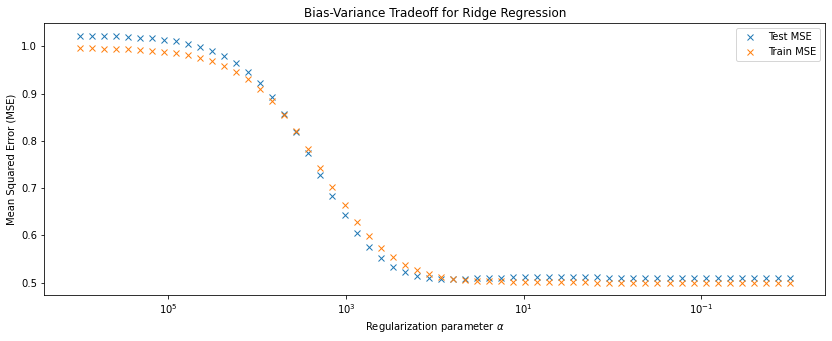

Model with optimal regularization parameter alpha:  Ridge(alpha=62.605165720148214)
Best test MSE:  0.5075209051956817


(0.5075209051956817, 0.5075209051956817)

In [21]:
p_train_X = poly.transform(train_X)
p_test_X = poly.transform(test_X)

train_MSE, test_MSE, train_scores, test_scores, Ridge_opt = \
    computeScoresMSE(Ridge,alphas,p_train_X,train_y,p_test_X,test_y)
plt.figure(figsize=(14,5))
plt.semilogx(alphas,test_MSE,'x',label="Test MSE")
plt.semilogx(alphas,train_MSE,'x',label="Train MSE")
plt.xlabel(r"Regularization parameter $\alpha$")
plt.ylabel(r"Mean Squared Error (MSE)")
plt.title("Bias-Variance Tradeoff for Ridge Regression")
ax = plt.gca()
ax.invert_xaxis()
plt.legend()
plt.show()

print("Model with optimal regularization parameter alpha: ",Ridge_opt)
print("Best test MSE: ",min(test_MSE)) # compare with np.mean((test_y-Ridge_opt.predict(test_X))**2)
(min(test_MSE) , np.mean((test_y-Ridge_opt.predict(p_test_X))**2))

In [24]:
# Check the calculation of R2:
y_test_avg = np.mean(test_y)
rsquared = 1 - np.linalg.norm(test_y-Ridge_opt.predict(p_test_X))**2 / np.linalg.norm(test_y-y_test_avg)**2
(max(test_scores),rsquared)

(0.4747137579967623, 0.4747137579967623)

### Lasso Regression
We repeat this experiment for the Lasso.

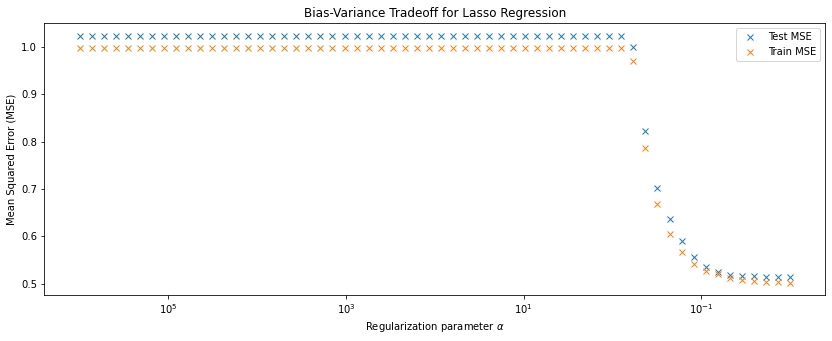

Model with optimal regularization parameter alpha:  Lasso(alpha=0.01)
Best test MSE:  0.5152150725305203


In [25]:
from sklearn.linear_model import Lasso
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning) # this is to suppress warnings related to the optimization in the training of Lasso

train_MSE, test_MSE, train_scores, test_scores, Lasso_opt = \
    computeScoresMSE(Lasso,alphas,p_train_X,train_y,p_test_X,test_y)
plt.figure(figsize=(14,5))
plt.semilogx(alphas,test_MSE,'x',label="Test MSE")
plt.semilogx(alphas,train_MSE,'x',label="Train MSE")
plt.xlabel(r"Regularization parameter $\alpha$")
plt.ylabel(r"Mean Squared Error (MSE)")
plt.title("Bias-Variance Tradeoff for Lasso Regression")
ax = plt.gca()
ax.invert_xaxis()
plt.legend()
plt.show()

print("Model with optimal regularization parameter alpha: ",Lasso_opt)
print("Best test MSE: ",np.mean((test_y-Lasso_opt.predict(p_test_X))**2))

We observe that the regularization parameter $\alpha$ resulting in the smallest test MSE is different for Ridge and Lasso regression.

Finally, we create a plot that visualizes the differences between the coefficients returned by the two different methods.

In [26]:
Lasso_opt.coef_

array([ 0.        , -0.00706299,  0.38974736,  0.13537008, -0.09966838,
       -0.        , -0.07735544,  0.        ,  0.32741622,  0.00420932])

In [27]:
Ridge_opt.coef_

array([ 0.        , -0.01395252,  0.33143131,  0.14399741, -0.03124316,
       -0.06309664, -0.09622668,  0.04694587,  0.24743992,  0.03877927])

In [28]:
print(features_names)

['1', 'AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']


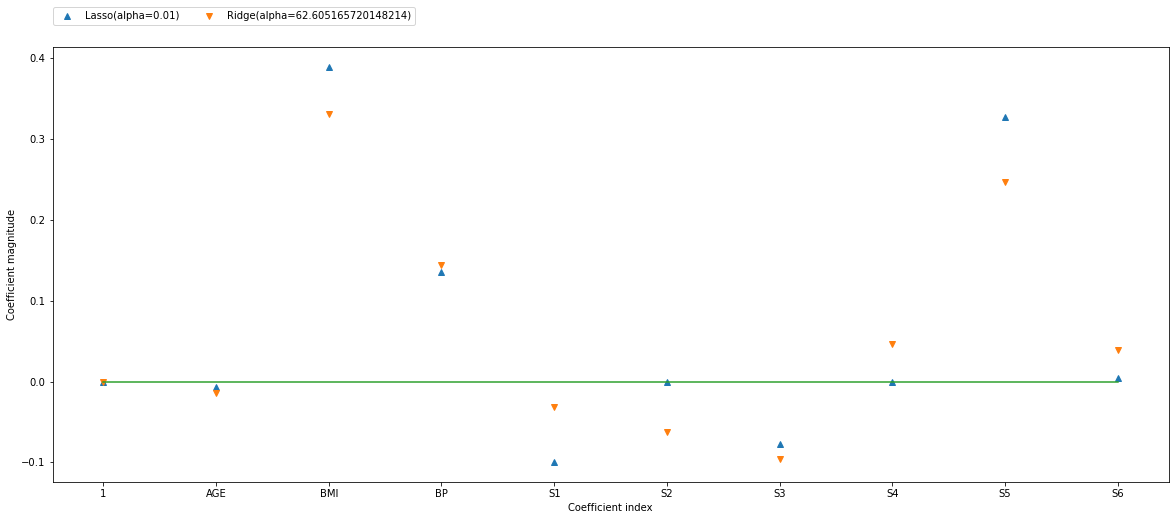

In [29]:
plt.figure(figsize=(20,8))
plt.plot(Lasso_opt.coef_, '^', label=str(Lasso_opt))
plt.plot(Ridge_opt.coef_, 'v', label=str(Ridge_opt))
plt.plot(np.arange(np.size(Lasso_opt.coef_)),np.zeros(np.size(Lasso_opt.coef_)))
plt.legend(ncol=2, loc=(0, 1.05))
#plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.xticks(ticks = np.arange(Lasso_opt.coef_.size),labels=features_names)
plt.show()
#ax = plt.gca()
#ax.set_xlabels(features_names)

The coefficient vector $\widehat{\beta}$ returned by Lasso is _sparser_ then the one returned by Ridge regression. This leads to a better interpretability of the results Lasso, as it performs _variable selection_: Ideally, we can infer from the non-zero coeffcients of the coefficient vector $\widehat{\beta}$ _which predictor variables_ are most relevant.

#### Regularized Regression & Bias-Variance Tradeoff
For both Ridge regression and Lasso regression it is true that:
  - $\alpha \approx 0$ or small: Larger variance, smaller bias
  - $\alpha$ large: Small variance, large bias

# Linear Algebra for Data Science

Matrix decompositions and linear algebra are at the core of many techniques in data science.
Please review Chapter 4 (and, if necessary, Chapter 2) of the [book by Deisenroth, Faisal and Ong](https://mml-book.github.io/book/mml-book.pdf).
### Data sample matrix and sample covariance matrix

- We generate $n = 20$ points in 2d sampled as i.i.d. standard Gaussians. Their $x$-coordinates are streched by a factor $4$, and their location is subsequently rotated by $45°$, after which a shift by $(1,3)$ is applied. This gives rise to the data matrix $X \in \mathbb{R}^{2 \times 20}$.

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


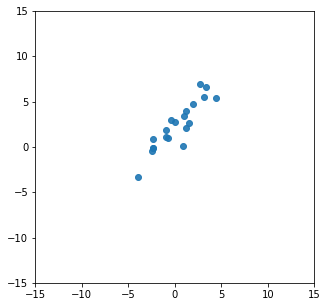

In [31]:
from scipy.stats import norm
n = 20
# generate multiple 2-D (column) vectors
S = norm.rvs(0,1,(2,n))
S[0,:] *= 4  # scale axis 0
f = +pi/4    # rotate by 45 degrees
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(S)
X += np.array([[1],[3]]) # shift

figure(figsize=(5,5)); xlim(-15,15); ylim(-15,15);
plot(X[0,:],X[1,:],'o',alpha=0.9)

Let $\overline{X}$ be the matrix with row averages of $X$, and $\widetilde{X} = X -\overline{X}$.
> Sample covariance matrix corresponds to
><br/><br/>
>$\displaystyle C =  \frac{1}{n\!-\!1}\widetilde{X}\widetilde{X}^T =  \frac{1}{n\!-\!1}\ (X- \overline{X})(X- \overline{X})^T = \frac{1}{n\!-\!1}\  \sum_{i=1}^n (x_i- \overline{x}) (x_i- \overline{x})^T$

We observe that there is a close relationship between the

- Singular Value Decomposition (SVD)

>$\displaystyle \widetilde{X} = U W V^T$
><br/><br/>
> where $U^TU=I$, $W$ is diagonal, and $V^TV=I$,
>> Columns of $U$ are **left singular vectors** of $\widetilde{X}$, <br>
>> Columns of $V$ are **right singular vectors** of $\widetilde{X}$.

and the 
- Eigendecomposition

>$\displaystyle C=E\Lambda E^T$ <br><br>
> of the sample covariance matrix $C$, since

>$\displaystyle C = \frac{1}{n\!-\!1}\  UWV^T\ VWU^T = \frac{1}{n\!-\!1}\ U W^2 U^T$.
><br/><br/>
> So, if $C=E\Lambda E^T$ then $E = U$ and $\displaystyle \Lambda = \frac{1}{n\!-\!1}\  W^2$.

In [ ]:
X

In [ ]:
# subtract sample mean
avg = mean(X, axis=1).reshape(X[:,1].size,1)
Xtilde = X- avg
Xtilde

In [ ]:
# sample covariance matrix
C = Xtilde.dot(Xtilde.T) / (X[0,:].size-1) 
print ("Average\n", avg)
print ("Covariance\n", C)

In [ ]:
L, E = np.linalg.eig(C)
E, L

In [ ]:
E, L, E_same = np.linalg.svd(C)
E, L

In [ ]:
E.dot(E.T)

In [ ]:
np.allclose( E.T, np.linalg.inv(E) )

In [ ]:
U, W, V = np.linalg.svd(X)
U, W**2 / (X[0,:].size-1)

In [ ]:
# alternatively
U, W**2 / (X.shape[1]-1)

In [ ]:
[ np.allclose( U.dot(U.T), np.eye(U.shape[0]) ), 
  np.allclose( V.dot(V.T), np.eye(V.shape[0]) )  ]